In [3]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from numpy import linalg as LA
import random
import networkx as nx
import pandas as pd
import community 
from community import community_louvain

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
def grado_promedio(grafo):
    """
    :param grafo:
    :return: grado promedio (k) del grafo
    """
    total = 0
    for v in grafo:
        total += len(list(grafo.neighbors(v)))
    return total / len(grafo)

In [7]:
def aristas_que_cruzan(communitie, G):
    total=0
    nodo_actual=0
    vecinos = []
    subgraph=nx.Graph()
    subgraph= G.subgraph(list(communitie))
    for i in range(len(communitie)):
        nodo_actual= communitie[i]
        vecinos = list(G.neighbors(nodo_actual))
        for j in range(len(vecinos)):
            if not subgraph.has_node(vecinos[j]) :
                total= total +1
                
        
    return total

In [8]:
def print_communities1(G):
  plt.figure(figsize=(20,15))
  plt.title('Comunidades con algoritmo de Louvain')

  available_colors = {0:'#D2553C', 1:'#E7E541', 2:'#86E432', 3:'#32E4CE',4:'#BB8FCE',5:'#E67E22'} 
  colors = [available_colors[partition1[node]] for node in G.nodes()] 
  labels = {node: node for node in G.nodes()}

  nx.draw_networkx_nodes(G, pos_nodes1, nodelist=G.nodes(), node_color=colors,alpha=0.4, node_size=700, linewidths=2)
  nx.draw_networkx_edges(G, pos_nodes1, width=0.3, alpha=0.5, style='dotted')
  nx.draw_networkx_labels(G, pos_nodes1, labels=labels)
  plt.plot()

In [9]:
def print_communities2(G):
  plt.figure(figsize=(20,15))
  plt.title('Comunidades con algoritmo de Louvain')

  available_colors = {0:'#D2553C', 1:'#E7E541', 2:'#86E432', 3:'#32E4CE'} 
  colors = [available_colors[partition2[node]] for node in G.nodes()] 
  labels = {node: node for node in G.nodes()}

  nx.draw_networkx_nodes(G, pos_nodes2, nodelist=G.nodes(), node_color=colors,alpha=0.4, node_size=700, linewidths=2)
  nx.draw_networkx_edges(G, pos_nodes2, width=0.3, alpha=0.5, style='dotted')
  nx.draw_networkx_labels(G, pos_nodes2, labels=labels)
  plt.plot()

### Primera Red a analizar -----> Antes de la implementacion de PREVIAJE (año 2019)

In [10]:
path= "/content/drive/MyDrive/red2019.csv"
df= pd.read_csv(path)
df.head()

,ORIGEN,DESTINO,AÑO,PREVIAJE,TURISMO
0,Mar del plata,Tandil,2019,NO,4
1,Mar del plata,Pinamar,2019,NO,200
2,Mar del plata,Partido de la costa,2019,NO,800
3,Mar del plata,CABA,2019,NO,1000
4,Mar del plata,Resistencia,2019,NO,2


In [11]:
red1 = nx.from_pandas_edgelist(df, source= "ORIGEN",target= "DESTINO", edge_attr=['AÑO','PREVIAJE','TURISMO'])

In [12]:
print(red1)

Graph with 76 nodes and 265 edges


In [13]:
sum=0
for u,v,e in red1.edges(data=True):
  sum =(e.get("TURISMO")) + sum
print("Segun la Red de datos en el 2019 se realizaron ",sum,"ventas de viajes")

Segun la Red de datos en el 2019 se realizaron  13887 ventas de viajes


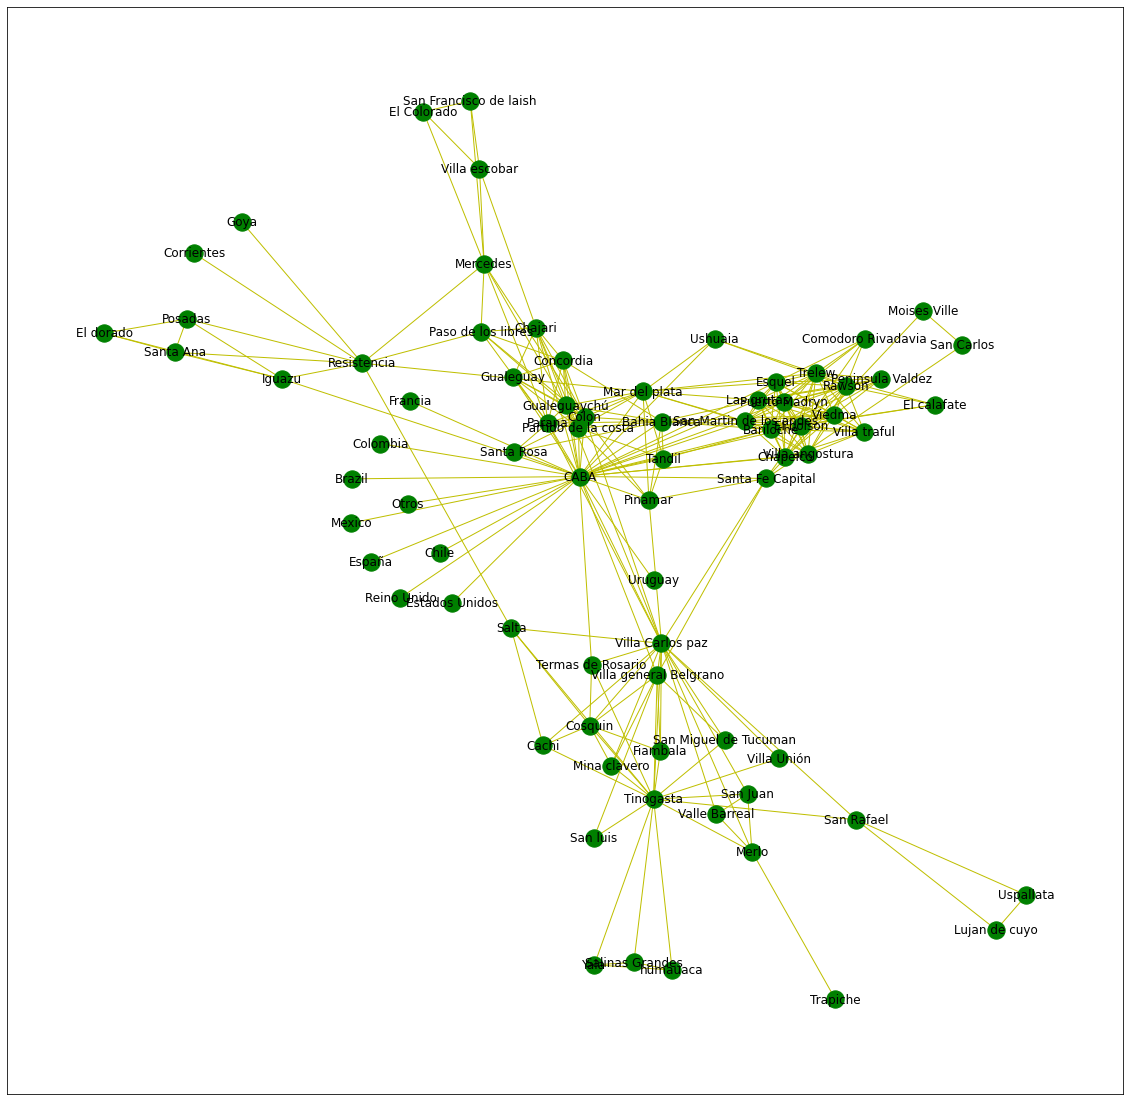

In [14]:
plt.figure(figsize=(20,20))
nx.draw_networkx(red1, with_labels = True, node_color= 'g', edge_color='y')

In [15]:
print('Diámetro:', nx.diameter(red1))

Diámetro: 5


In [16]:
print('Grado Promedio:',grado_promedio(red1))

Grado Promedio: 6.973684210526316


In [ ]:
print('Coeficiente de Clustering Promedio:',nx.average_clustering(red1))

In [16]:
 nx.has_bridges(red1)

True

In [18]:
list(nx.bridges(red1))

[('CABA', 'Brazil'),
 ('CABA', 'Uruguay'),
 ('CABA', 'Chile'),
 ('CABA', 'Estados Unidos'),
 ('CABA', 'Mexico'),
 ('CABA', 'Colombia'),
 ('CABA', 'España'),
 ('CABA', 'Francia'),
 ('CABA', 'Reino Unido'),
 ('CABA', 'Otros'),
 ('Resistencia', 'Corrientes'),
 ('Resistencia', 'Goya'),
 ('Merlo', 'Trapiche')]

In [55]:
betweenness_centrality_weighted1= nx.betweenness_centrality(red1)

In [56]:
for node in sorted(betweenness_centrality_weighted1, key=betweenness_centrality_weighted1.get, reverse=True):
  print(node, betweenness_centrality_weighted1[node])

CABA 0.5347428241600841
Villa Carlos paz 0.28869344329450447
Tinogasta 0.1077335517335517
Resistencia 0.09194325540745443
Santa Fe Capital 0.06535952546824686
Villa general Belgrano 0.06050211634302065
Mar del plata 0.059671352607430866
Iguazu 0.0577951302951303
Mercedes 0.055676771117947596
San Rafael 0.052612612612612616
Colon 0.04103299717889837
Parana 0.03815444406842676
Salta 0.03731992311722042
Gualeguaychú 0.0342790686930514
Bariloche 0.02871482794304967
Merlo 0.02723723723723724
Chajari 0.02528096744235764
El bolson 0.02094669157141412
Bahia Blanca 0.019039985744720742
Termas de Rosario 0.018765739274863524
Puerto Madryn 0.01783611562111574
Esquel 0.01783611562111574
Pinamar 0.011457982567843533
Las grutas 0.011359683984406531
Trelew 0.009958280726296025
San Martin de los andes 0.00861350875016521
Villa angostura 0.006348120662795698
Chapelco 0.006348120662795698
Comodoro Rivadavia 0.006122803786363899
Paso de los libres 0.005881595881595884
Villa escobar 0.0053012363012363015


In [40]:
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    #labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [41]:
pos = nx.spring_layout(red1, seed=675)

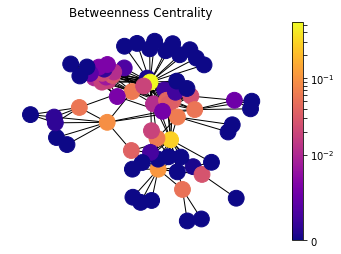

In [42]:
draw(red1, pos, nx.betweenness_centrality(red1), 'Betweenness Centrality')


### Homofilia y Comunidades Red 1



In [19]:
partition1 = community.community_louvain.best_partition(red1, random_state=9)
count=list(set([i for i in partition1.values()]))
print("Cantidad de comunidades detectadas:",len(count))

Cantidad de comunidades detectadas: 5


In [20]:
value_map1 = {
    0 : (0,5),
    1 : (5,10),
    2 : (10,15),
    3 : (15,20),
    4 : (20,25),
}
def get_pos1(node):
  x1, x2 = value_map1[partition1[node]]
  return random.uniform(x1, x2), random.uniform(0, 20)
nodes = red1.nodes
pos_nodes1 = {}
for node in nodes: 
  pos_nodes1[node] = get_pos1(node)



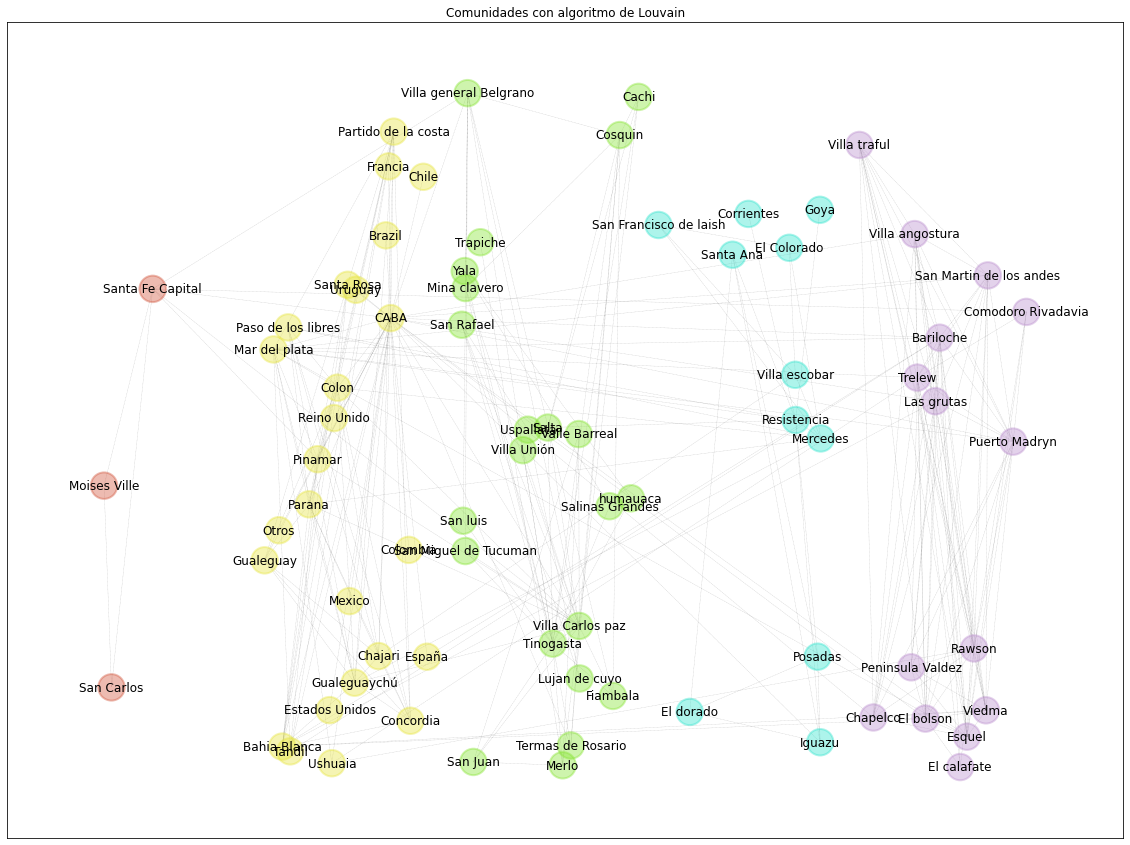

In [21]:
print_communities1(red1)

In [22]:
community_0=[]
community_1=[]
community_2=[]
community_3=[]
community_4=[]
communities=[]
for i in partition1.items():
  if i[1]==0:
    community_0.append(i[0])
  if i[1]==1:
    community_1.append(i[0])
  if i[1]==2:
    community_2.append(i[0])
  if i[1]==3:
    community_3.append(i[0])
  if i[1]==4:
    community_4.append(i[0])
          
communities.append(community_0)
communities.append(community_1) 
communities.append(community_2) 
communities.append(community_3) 
communities.append(community_4) 

In [23]:
for i in range(len(communities)):
    print("Comunidad ------>",i,":\n",communities[i])

Comunidad ------> 0 :
 ['Santa Fe Capital', 'Moises Ville', 'San Carlos']
Comunidad ------> 1 :
 ['Mar del plata', 'Tandil', 'Pinamar', 'Partido de la costa', 'CABA', 'Parana', 'Colon', 'Gualeguaychú', 'Ushuaia', 'Bahia Blanca', 'Brazil', 'Uruguay', 'Chile', 'Estados Unidos', 'Mexico', 'Colombia', 'España', 'Francia', 'Reino Unido', 'Otros', 'Concordia', 'Chajari', 'Gualeguay', 'Santa Rosa', 'Paso de los libres']
Comunidad ------> 2 :
 ['Villa Carlos paz', 'Villa general Belgrano', 'Termas de Rosario', 'Tinogasta', 'Fiambala', 'Cosquin', 'Mina clavero', 'humauaca', 'Yala', 'Salinas Grandes', 'Villa Unión', 'San Rafael', 'Cachi', 'Salta', 'San Juan', 'Merlo', 'San luis', 'San Miguel de Tucuman', 'Valle Barreal', 'Uspallata', 'Lujan de cuyo', 'Trapiche']
Comunidad ------> 3 :
 ['Resistencia', 'Iguazu', 'Corrientes', 'Goya', 'Mercedes', 'Santa Ana', 'Posadas', 'Villa escobar', 'San Francisco de laish', 'El Colorado', 'El dorado']
Comunidad ------> 4 :
 ['Trelew', 'Puerto Madryn', 'Esquel'

In [24]:
for i in range(len(communities)):
    print("Cantidad de nodos en la comunidad -------->",i,":",len(communities[i]))


Cantidad de nodos en la comunidad --------> 0 : 3
Cantidad de nodos en la comunidad --------> 1 : 25
Cantidad de nodos en la comunidad --------> 2 : 22
Cantidad de nodos en la comunidad --------> 3 : 11
Cantidad de nodos en la comunidad --------> 4 : 15


In [25]:
sum=0
for i in range(len(communities)):    
    print("Cantidad de aristas que cruzan de la comunidad",i,"-------->",aristas_que_cruzan(list(communities[i]), red1))
    sum = sum +(aristas_que_cruzan(list(communities[i]), red1))
print("Cantidad total de aristas que cruzan -------->",sum/2)  

Cantidad de aristas que cruzan de la comunidad 0 --------> 5
Cantidad de aristas que cruzan de la comunidad 1 --------> 37
Cantidad de aristas que cruzan de la comunidad 2 --------> 10
Cantidad de aristas que cruzan de la comunidad 3 --------> 9
Cantidad de aristas que cruzan de la comunidad 4 --------> 21
Cantidad total de aristas que cruzan --------> 41.0


### Subcomunidades Red 1

In [26]:
subgraph1=nx.Graph()
subgraph1= red1.subgraph(list(communities[1]))
partition1 = community.community_louvain.best_partition(subgraph1)
count=list(set([i for i in partition1.values()]))
print("Cantidad de comunidades detectadas:",len(count))

Cantidad de comunidades detectadas: 3


In [31]:
subgraph1_community_0=[]
subgraph1_community_1=[]
subgraph1_community_2=[]
subgraph1_communities1=[]
for i in partition1.items():
  if i[1]==0:
    subgraph1_community_0.append(i[0])
  if i[1]==1:
    subgraph1_community_1.append(i[0])
  if i[1]==2:
    subgraph1_community_2.append(i[0])
  

subgraph1_communities1.append(subgraph1_community_0)
subgraph1_communities1.append(subgraph1_community_1) 
subgraph1_communities1.append(subgraph1_community_2) 


In [32]:
for i in range(len(subgraph1_communities1)):
    print("Comunidad ------>",i,":\n",subgraph1_communities1[i])

Comunidad ------> 0 :
 ['Pinamar', 'Bahia Blanca', 'Tandil', 'Mar del plata', 'Partido de la costa']
Comunidad ------> 1 :
 ['Ushuaia', 'Mexico', 'Reino Unido', 'CABA', 'Estados Unidos', 'Uruguay', 'España', 'Chile', 'Francia', 'Brazil', 'Colombia', 'Otros']
Comunidad ------> 2 :
 ['Gualeguay', 'Chajari', 'Parana', 'Gualeguaychú', 'Concordia', 'Paso de los libres', 'Santa Rosa', 'Colon']


In [33]:
for i in range(len(subgraph1_communities1)):
    print("Cantidad de nodos en la comunidad -------->",i,":",len(subgraph1_communities1[i]))

Cantidad de nodos en la comunidad --------> 0 : 5
Cantidad de nodos en la comunidad --------> 1 : 12
Cantidad de nodos en la comunidad --------> 2 : 8


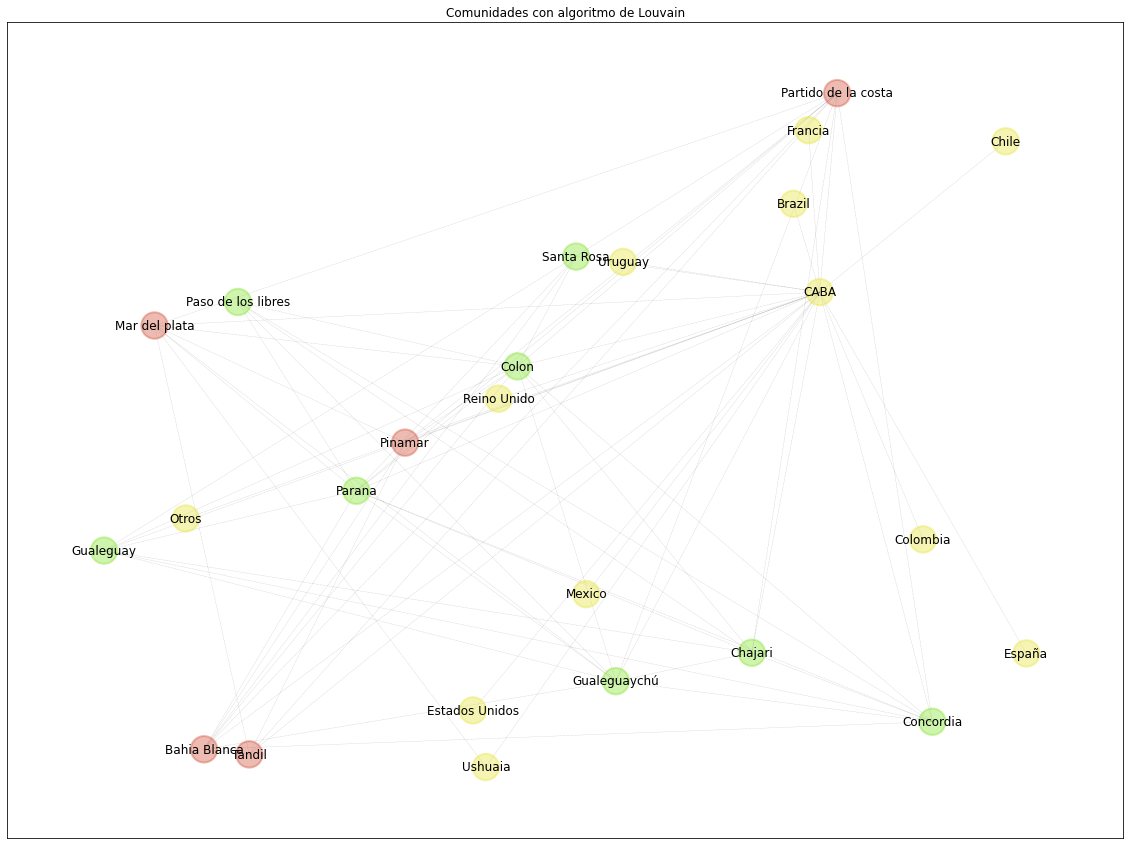

In [34]:
print_communities1(subgraph1)

### Segunda Red a analizar -----> Implememtacion del PREVIAJE 1 edicion (año 2020)

In [23]:
path= "/content/drive/MyDrive/red2020.6.csv"
df= pd.read_csv(path)
df.head()

,ORIGEN,DESTINO,AÑO,TURISMO CON PREVIAJE,TURISMO SIN PREVIAJE
0,Mar del plata,Tandil,2020.0,52,4
1,Mar del plata,Pinamar,2020.0,134,200
2,Mar del plata,Partido de la costa,2020.0,12,800
3,Mar del plata,CABA,2020.0,22,1000
4,Mar del plata,Puerto Madryn,2020.0,200,150


In [24]:
red2 = nx.from_pandas_edgelist(df, source= "ORIGEN",target= "DESTINO", edge_attr=['AÑO','TURISMO CON PREVIAJE','TURISMO SIN PREVIAJE'])

In [25]:
print(red2)

Graph with 72 nodes and 457 edges


In [26]:
sum1=0
sum2=0
for u,v,e in red2.edges(data=True):
  sum1 =(e.get("TURISMO CON PREVIAJE"))  + sum1
  sum2 = (e.get("TURISMO SIN PREVIAJE")) + sum2
print("Segun la Red de datos en el 2020 se realizaron ",sum1 + sum2 ,"ventas de viajes")
print(sum1," ventas de viajes con PREVIAJE")
print(sum2," ventas de viajes sin PREVIAJE")

Segun la Red de datos en el 2020 se realizaron  34819 ventas de viajes
21821  ventas de viajes con PREVIAJE
12998  ventas de viajes sin PREVIAJE


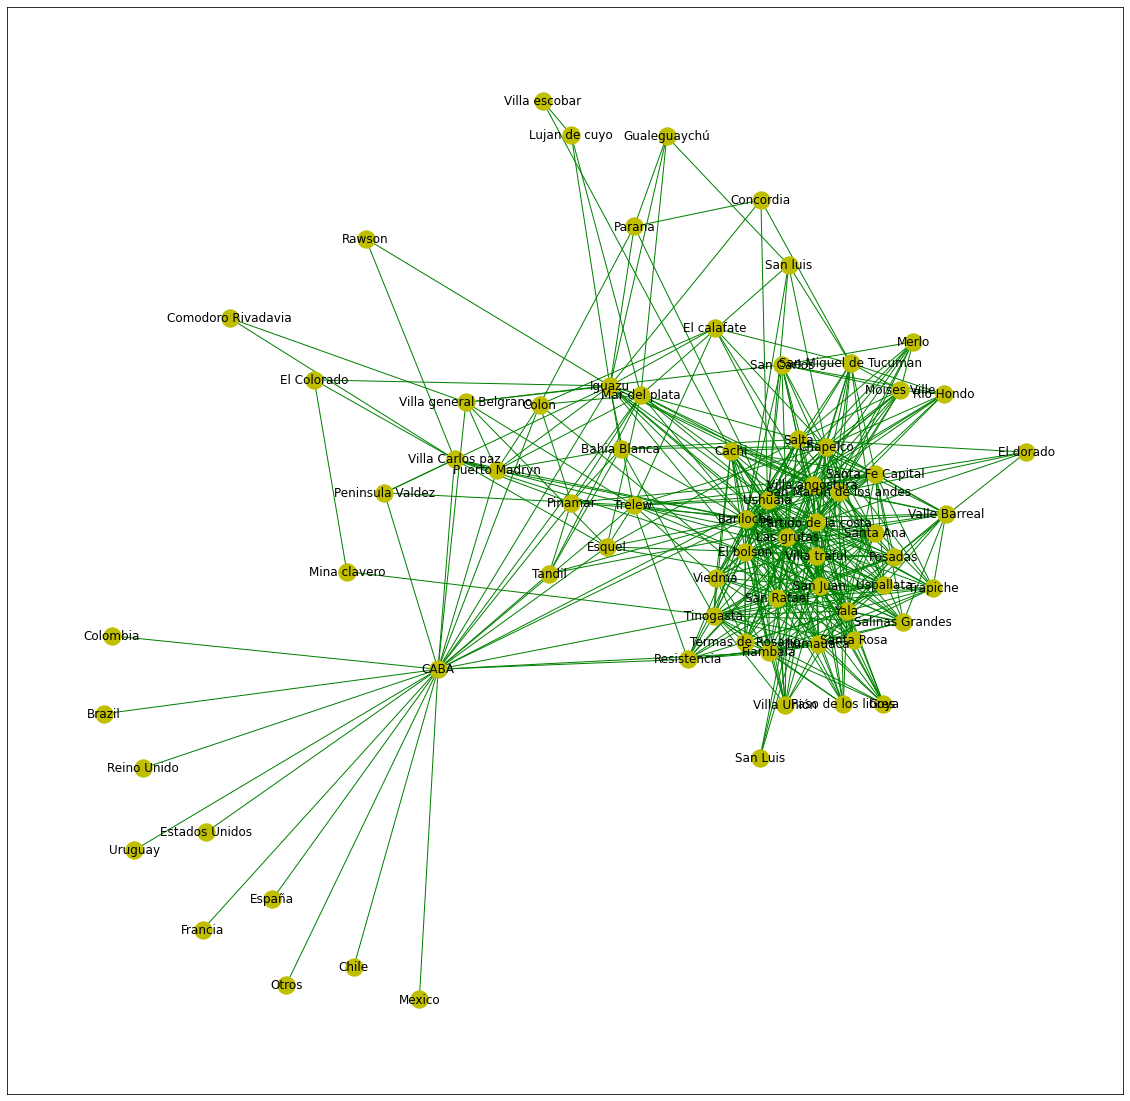

In [27]:
plt.figure(figsize=(20,20))
nx.draw_networkx(red2, with_labels = True, node_color= 'y', edge_color='g')

In [28]:
print('Diámetro:', nx.diameter(red2))

Diámetro: 4


In [29]:
print('Grado Promedio:',grado_promedio(red2))

Grado Promedio: 12.694444444444445


In [30]:
print('Coeficiente de Clustering Promedio:',nx.average_clustering(red2))

Coeficiente de Clustering Promedio: 0.42041053996149813


In [31]:
 nx.has_bridges(red2)

True

In [32]:
list(nx.bridges(red2))

[('CABA', 'Brazil'),
 ('CABA', 'Uruguay'),
 ('CABA', 'Chile'),
 ('CABA', 'Estados Unidos'),
 ('CABA', 'Mexico'),
 ('CABA', 'Colombia'),
 ('CABA', 'España'),
 ('CABA', 'Francia'),
 ('CABA', 'Reino Unido'),
 ('CABA', 'Otros')]

In [52]:
betweenness_centrality_weighted2= nx.betweenness_centrality(red2)

In [57]:
for node in sorted(betweenness_centrality_weighted2, key=betweenness_centrality_weighted2.get, reverse=True):
  print(node, betweenness_centrality_weighted2[node])

CABA 0.2838411468959879
Bariloche 0.143618527295299
Iguazu 0.10604380525326365
Ushuaia 0.09563308500860535
Partido de la costa 0.05696494318911214
Tinogasta 0.05359081426681334
Villa angostura 0.03857518905227633
Villa Carlos paz 0.036416390209112214
Mar del plata 0.03485880214303525
San Martin de los andes 0.030062347616127805
Trelew 0.02528429047009454
Chapelco 0.023956689726578575
Cachi 0.02337096518922156
Fiambala 0.02160679619220463
El bolson 0.019113258903651575
San Rafael 0.014369268237172876
Las grutas 0.013621265068056389
Villa general Belgrano 0.012120905750921136
San Juan 0.01109172371001263
Salta 0.010380517859990886
Resistencia 0.009044851480078008
Esquel 0.008316872136200618
Pinamar 0.007224491430577792
Colon 0.006953092197461643
San Carlos 0.006919031039418383
San Miguel de Tucuman 0.006451591515028478
Posadas 0.006354382044121577
Lujan de cuyo 0.006078350444547628
Yala 0.005995229434271823
Santa Fe Capital 0.005233082450845551
El Colorado 0.0049880064336367365
humauaca 

In [58]:
pos = nx.spring_layout(red2, seed=675)

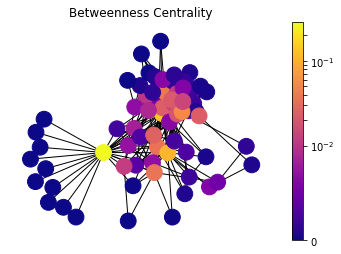

In [59]:
draw(red2, pos, nx.betweenness_centrality(red2), 'Betweenness Centrality')


### Homofilia y Comunidades Red 2

In [60]:
partition2 = community.community_louvain.best_partition(red2, random_state=9)
count=list(set([i for i in partition2.values()]))
print("Cantidad de comunidades detectadas:",len(count))

Cantidad de comunidades detectadas: 3


In [61]:
value_map = {
    0 : (0,5),
    1 : (5,10),
    2 : (10,15),
    3 : (15,20),
}
def get_pos2(node):
  x1, x2 = value_map[partition2[node]]
  return random.uniform(x1, x2), random.uniform(0, 20)

nodes = red2.nodes
pos_nodes2 = {}
for node in nodes: 
  pos_nodes2[node] = get_pos2(node)



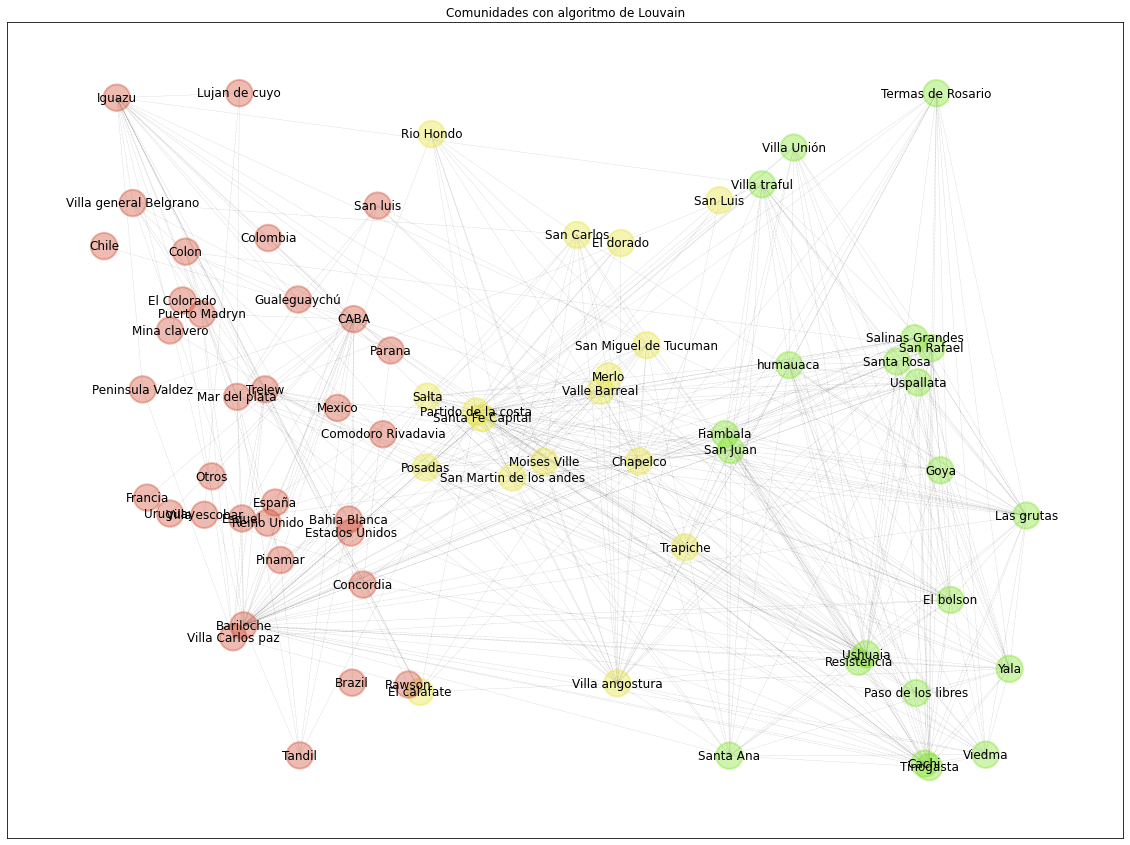

In [62]:
print_communities2(red2)

In [63]:
community_0=[]
community_1=[]
community_2=[]
communities=[]
for i in partition2.items():
     if i[1]==0:
          community_0.append(i[0])
     if i[1]==1:
          community_1.append(i[0])
     if i[1]==2:
          community_2.append(i[0])
     

communities.append(community_0)
communities.append(community_1) 
communities.append(community_2) 
   

In [64]:
for i in range(len(communities)):
    print("Comunidad ------>",i,":\n",communities[i])

Comunidad ------> 0 :
 ['Mar del plata', 'Tandil', 'Pinamar', 'CABA', 'Puerto Madryn', 'Esquel', 'Colon', 'Gualeguaychú', 'Lujan de cuyo', 'Iguazu', 'Bariloche', 'Bahia Blanca', 'Villa Carlos paz', 'Brazil', 'Uruguay', 'Chile', 'Estados Unidos', 'Mexico', 'Colombia', 'España', 'Francia', 'Reino Unido', 'Otros', 'Trelew', 'Peninsula Valdez', 'Villa general Belgrano', 'Mina clavero', 'Rawson', 'Comodoro Rivadavia', 'El Colorado', 'Parana', 'Concordia', 'San luis', 'Villa escobar']
Comunidad ------> 1 :
 ['Partido de la costa', 'San Martin de los andes', 'Villa angostura', 'Santa Fe Capital', 'Salta', 'Chapelco', 'El calafate', 'San Carlos', 'San Luis', 'San Miguel de Tucuman', 'El dorado', 'Moises Ville', 'Rio Hondo', 'Valle Barreal', 'Merlo', 'Trapiche', 'Posadas']
Comunidad ------> 2 :
 ['Ushuaia', 'humauaca', 'Viedma', 'Santa Ana', 'Uspallata', 'Goya', 'Paso de los libres', 'Las grutas', 'El bolson', 'Villa traful', 'Santa Rosa', 'Termas de Rosario', 'Cachi', 'Villa Unión', 'Salinas G

In [65]:
for i in range(len(communities)):
    print("Cantidad de nodos en la comunidad -------->",i,":",len(communities[i]))


Cantidad de nodos en la comunidad --------> 0 : 34
Cantidad de nodos en la comunidad --------> 1 : 17
Cantidad de nodos en la comunidad --------> 2 : 21


In [66]:
sum=0
for i in range(len(communities)):    
    print("Cantidad de aristas que cruzan de la comunidad",i,"-------->",aristas_que_cruzan(list(communities[i]), red2))
    sum = sum +(aristas_que_cruzan(list(communities[i]), red2))
print("Cantidad total de aristas que cruzan -------->",sum/2)  

Cantidad de aristas que cruzan de la comunidad 0 --------> 82
Cantidad de aristas que cruzan de la comunidad 1 --------> 125
Cantidad de aristas que cruzan de la comunidad 2 --------> 133
Cantidad total de aristas que cruzan --------> 170.0


### Subcomunidades Red 2

In [76]:
subgraph2=nx.Graph()
subgraph2= red2.subgraph(list(communities[0]))
partition2 = community.community_louvain.best_partition(subgraph2)
count=list(set([i for i in partition2.values()]))
print("Cantidad de comunidades detectadas:",len(count))


Cantidad de comunidades detectadas: 4


In [77]:
subgraph_community_0=[]
subgraph_community_1=[]
subgraph_community_2=[]
subgraph_community_3=[]
subgraph_communities=[]
for i in partition2.items():
     if i[1]==0:
          subgraph_community_0.append(i[0])
     if i[1]==1:
          subgraph_community_1.append(i[0])
     if i[1]==2:
          subgraph_community_2.append(i[0])
     if i[1]==3:
          subgraph_community_3.append(i[0])    

subgraph_communities.append(subgraph_community_0)
subgraph_communities.append(subgraph_community_1) 
subgraph_communities.append(subgraph_community_2) 
subgraph_communities.append(subgraph_community_3) 

In [81]:
for i in range(len(subgraph_communities)):
    print("Sub-Comunidad ------>",i,":\n",subgraph_communities[i])

Sub-Comunidad ------> 0 :
 ['Chile', 'Francia', 'Estados Unidos', 'Uruguay', 'Mexico', 'CABA', 'España', 'Otros', 'Reino Unido', 'Brazil', 'Colombia']
Sub-Comunidad ------> 1 :
 ['Mina clavero', 'Villa escobar', 'Concordia', 'El Colorado', 'Iguazu', 'Lujan de cuyo', 'Parana']
Sub-Comunidad ------> 2 :
 ['Comodoro Rivadavia', 'Villa general Belgrano', 'Villa Carlos paz', 'Esquel', 'Trelew', 'Rawson', 'Peninsula Valdez']
Sub-Comunidad ------> 3 :
 ['Tandil', 'San luis', 'Colon', 'Gualeguaychú', 'Bariloche', 'Bahia Blanca', 'Puerto Madryn', 'Pinamar', 'Mar del plata']


In [82]:
for i in range(len(subgraph_communities)):
    print("Cantidad de nodos en la sub-comunidad -------->",i,":",len(subgraph_communities[i]))

Cantidad de nodos en la sub-comunidad --------> 0 : 11
Cantidad de nodos en la sub-comunidad --------> 1 : 7
Cantidad de nodos en la sub-comunidad --------> 2 : 7
Cantidad de nodos en la sub-comunidad --------> 3 : 9


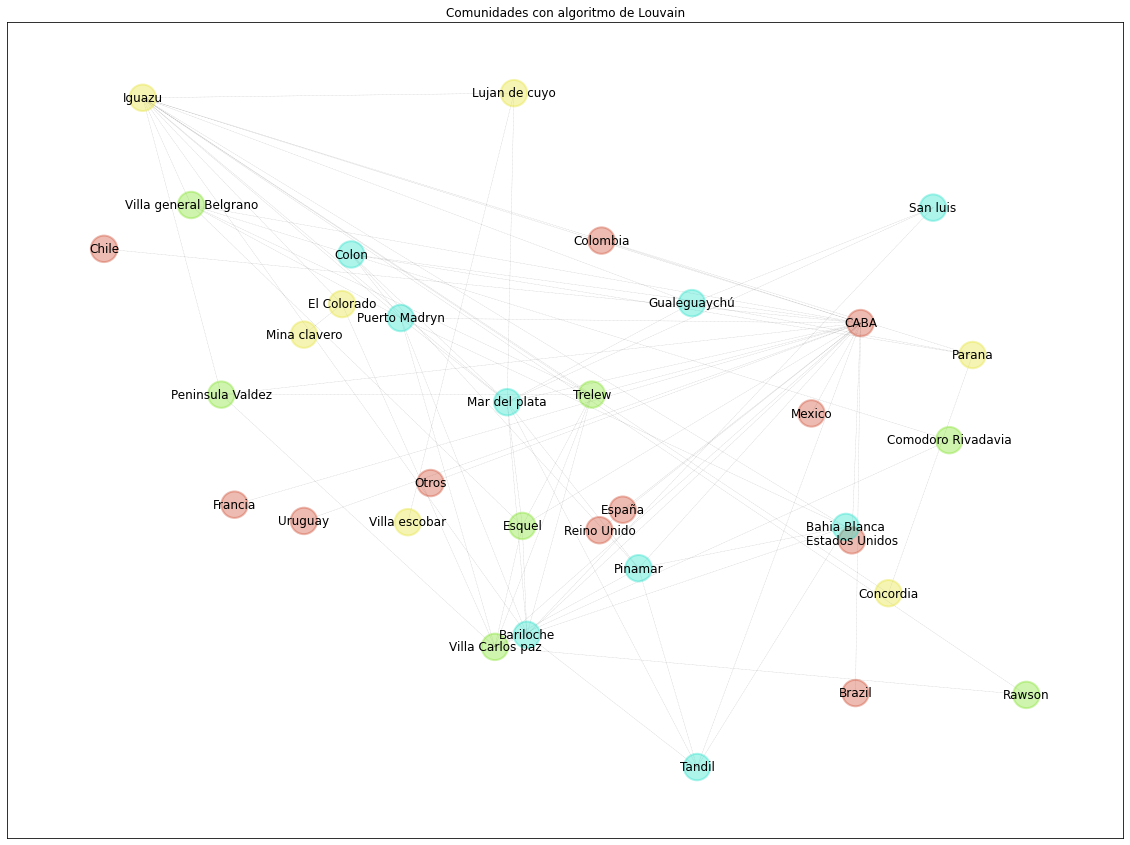

In [80]:
print_communities2(subgraph2)

### Deteccion de Roles en Red 2 

In [83]:
!pip install graphrole
from graphrole import RecursiveFeatureExtractor , RoleExtractor
import warnings
import seaborn as sns

feature_extractor = RecursiveFeatureExtractor(red2)
features = feature_extractor.extract_features()

# assign node roles
role_extractor = RoleExtractor(n_roles=None)
role_extractor.extract_role_factors(features)
node_roles = role_extractor.roles
print('\nNode role assignments:')
print(node_roles)



# build color palette for plotting
unique_roles = sorted(set(node_roles.values()))
color_map = sns.color_palette('Paired', n_colors=len(unique_roles))
# map roles to colors
role_colors = {role: color_map[i] for i, role in enumerate(unique_roles)}
# build list of colors for all nodes in flights_graph
node_colors = [role_colors[node_roles[node]] for node in red2.nodes]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 65 kB 3.7 MB/s 
     |████████████████████████████████| 1.6 MB 53.3 MB/s 
     |████████████████████████████████| 9.5 MB 47.9 MB/s 
     |████████████████████████████████| 25.9 MB 1.4 MB/s 
     |████████████████████████████████| 22.3 MB 1.2 MB/s 
     |████████████████████████████████| 14.8 MB 53.5 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
  


Node role assignments:
{'Bahia Blanca': 'role_1', 'Bariloche': 'role_0', 'Brazil': 'role_1', 'CABA': 'role_2', 'Cachi': 'role_2', 'Chapelco': 'role_0', 'Chile': 'role_1', 'Colombia': 'role_1', 'Colon': 'role_3', 'Comodoro Rivadavia': 'role_3', 'Concordia': 'role_1', 'El Colorado': 'role_3', 'El bolson': 'role_5', 'El calafate': 'role_1', 'El dorado': 'role_1', 'España': 'role_1', 'Esquel': 'role_5', 'Estados Unidos': 'role_1', 'Fiambala': 'role_5', 'Francia': 'role_1', 'Goya': 'role_2', 'Gualeguaychú': 'role_3', 'Iguazu': 'role_2', 'Las grutas': 'role_5', 'Lujan de cuyo': 'role_3', 'Mar del plata': 'role_2', 'Merlo': 'role_1', 'Mexico': 'role_1', 'Mina clavero': 'role_1', 'Moises Ville': 'role_2', 'Otros': 'role_1', 'Parana': 'role_1', 'Partido de la costa': 'role_0', 'Paso de los libres': 'role_2', 'Peninsula Valdez': 'role_3', 'Pinamar': 'role_3', 'Posadas': 'role_2', 'Puerto Madryn': 'role_1', 'Rawson': 'role_1', 'Reino Unido': 'role_1', 'Resistencia': 'role_2', 'Rio Hondo': 'role_

In [84]:
count=list(set([i for i in node_roles.values()]))
print("Cantidad de roles detectados:",len(count))

Cantidad de roles detectados: 6


In [85]:
rol_1=[]
rol_2=[]
rol_3=[]
rol_4=[]
rol_5=[]
rol_6=[]
roles=[]
for i in node_roles.items():
     if i[1]=='role_0':
          rol_1.append(i[0])
     if i[1]=='role_1':
          rol_2.append(i[0])
     if i[1]=='role_2':
          rol_3.append(i[0])
     if i[1]=='role_3':
          rol_4.append(i[0]) 
     if i[1]=='role_4':
          rol_5.append(i[0])
     if i[1]=='role_5':
          rol_6.append(i[0])    

roles.append(rol_1)
roles.append(rol_2) 
roles.append(rol_3) 
roles.append(rol_4) 
roles.append(rol_5)
roles.append(rol_6)

In [86]:
for i in range(len(roles)):
    print("Rol ------>",i,":\n",roles[i])


Rol ------> 0 :
 ['Bariloche', 'Chapelco', 'Partido de la costa']
Rol ------> 1 :
 ['Bahia Blanca', 'Brazil', 'Chile', 'Colombia', 'Concordia', 'El calafate', 'El dorado', 'España', 'Estados Unidos', 'Francia', 'Merlo', 'Mexico', 'Mina clavero', 'Otros', 'Parana', 'Puerto Madryn', 'Rawson', 'Reino Unido', 'Rio Hondo', 'San Luis', 'San luis', 'Tandil', 'Uruguay', 'Villa escobar']
Rol ------> 2 :
 ['CABA', 'Cachi', 'Goya', 'Iguazu', 'Mar del plata', 'Moises Ville', 'Paso de los libres', 'Posadas', 'Resistencia', 'Salinas Grandes', 'Salta', 'San Carlos', 'San Martin de los andes', 'San Miguel de Tucuman', 'Termas de Rosario', 'Trapiche', 'Trelew', 'Uspallata', 'Villa Carlos paz', 'Villa Unión']
Rol ------> 3 :
 ['Colon', 'Comodoro Rivadavia', 'El Colorado', 'Gualeguaychú', 'Lujan de cuyo', 'Peninsula Valdez', 'Pinamar', 'Villa general Belgrano']
Rol ------> 4 :
 ['Ushuaia', 'Villa angostura']
Rol ------> 5 :
 ['El bolson', 'Esquel', 'Fiambala', 'Las grutas', 'San Juan', 'San Rafael', 'San

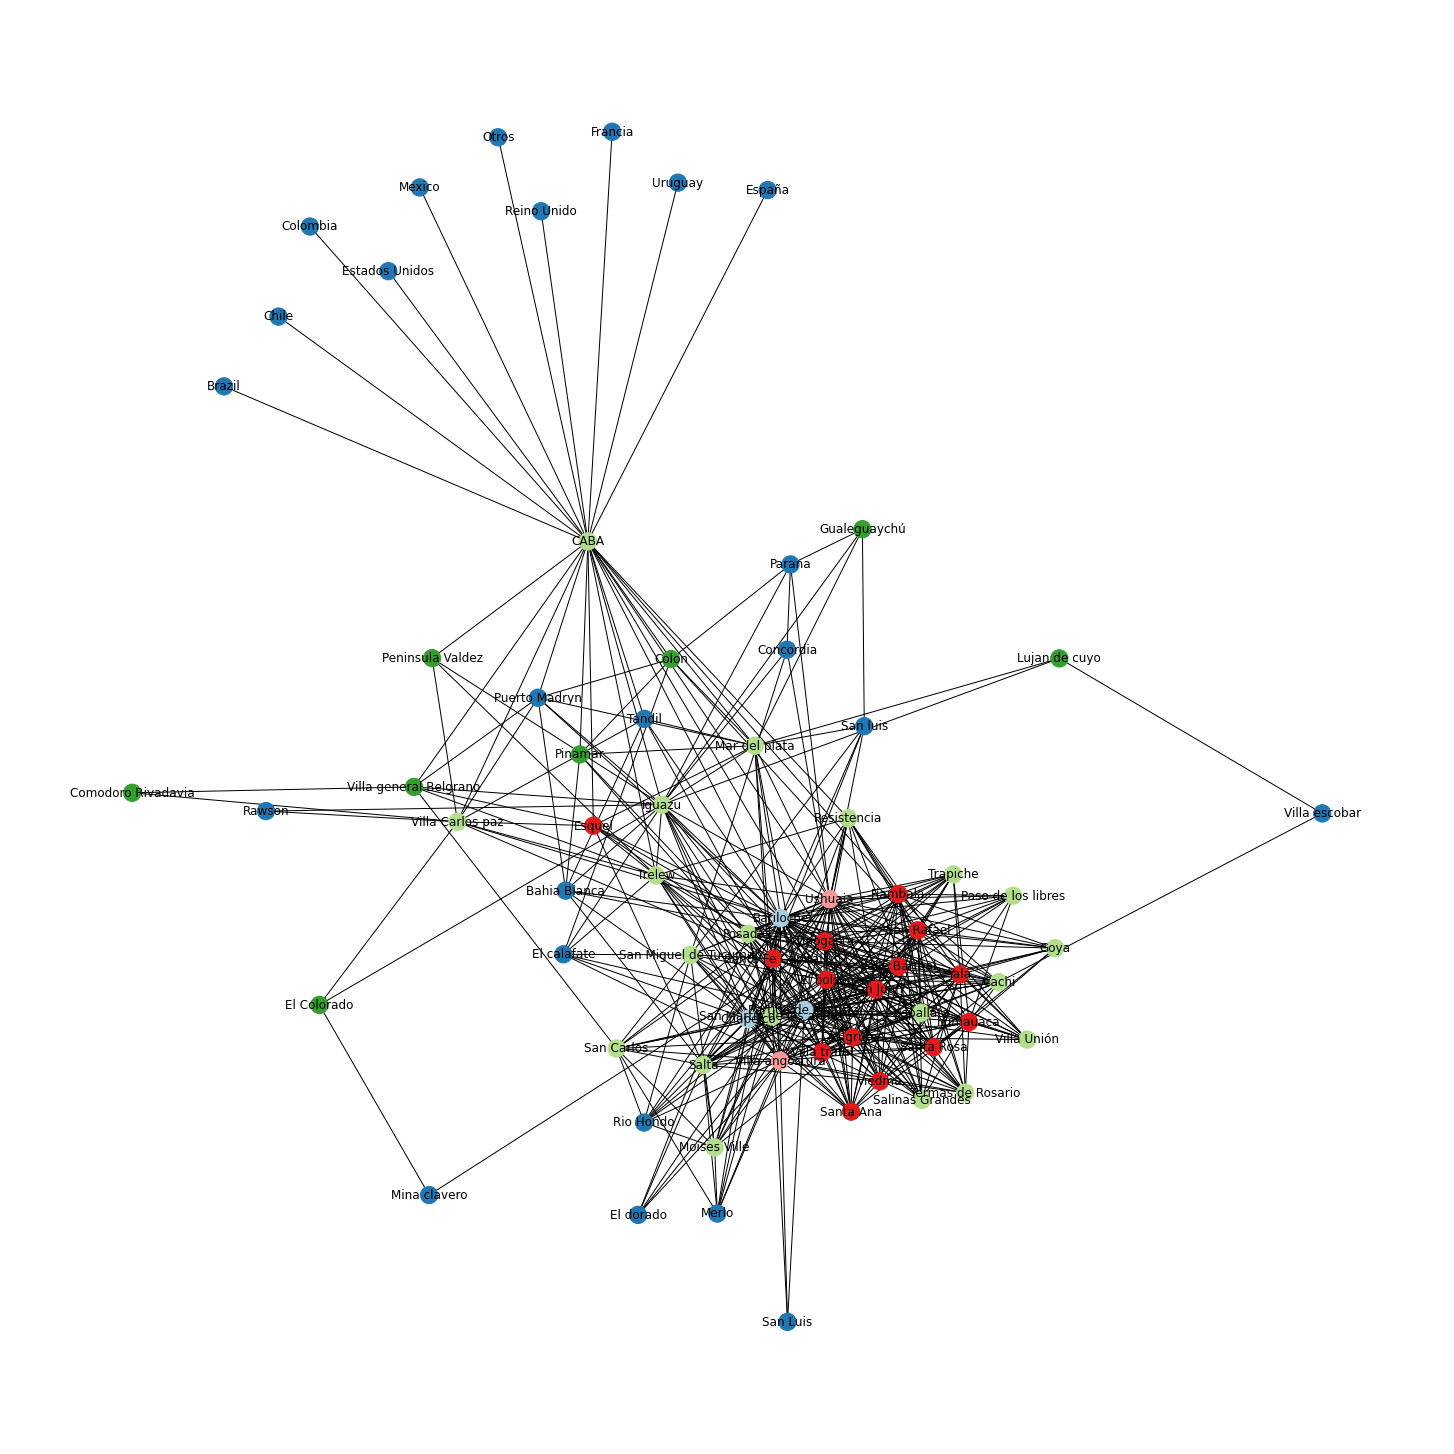

In [87]:
# plot graph
plt.figure(figsize=(20,20))

with warnings.catch_warnings():
    # catch matplotlib deprecation warning
    warnings.simplefilter('ignore')
    nx.draw(
        red2,
        pos=nx.spring_layout(red2, seed=42),
        with_labels=True,
        node_color=node_colors,
    )

plt.show()

In [64]:
!git clone https://github.com/mbuchwald/social-networks-utils.git


Cloning into 'social-networks-utils'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 21 (delta 3), reused 17 (delta 3), pack-reused 0
Unpacking objects: 100% (21/21), done.


In [65]:
%cd /content/social-networks-utils/


/content/social-networks-utils


In [67]:
!pwd /content/social-networks-utils/

/content/social-networks-utils


In [66]:
from motifs.calculos import calcular_motifs
from motifs.calculos import calcular_motifs, significance_profile, motif_grafo_eleatorios
from metricas import distribucion_grados
from modelos import configuration_model
from motifs.graficos import graficar_significant_profile


In [68]:
MAX_NODOS_MOTIFS = 5
motifs = calcular_motifs(subgraph2, MAX_NODOS_MOTIFS)
print(motifs)

[ 526   61 1212 1657  200 1128  189   23 1417 6177 4473 3689  845 5177
  133 2250 3133  204 1305  179  827   82 1006  664  499  227  110   54
    2]


In [69]:
dist = distribucion_grados(subgraph2)
promedios, stds = motif_grafo_eleatorios(lambda: configuration_model(dist), MAX_NODOS_MOTIFS, iters=20)
SP = significance_profile(motifs, promedios, stds)
print("SP:", SP)

Iteracion 1
Iteracion 2; anterior: 54.19 segs
Iteracion 3; anterior: 40.83 segs
Iteracion 4; anterior: 39.56 segs
Iteracion 5; anterior: 34.41 segs
Iteracion 6; anterior: 31.53 segs
Iteracion 7; anterior: 28.36 segs
Iteracion 8; anterior: 44.20 segs
Iteracion 9; anterior: 36.32 segs
Iteracion 10; anterior: 52.67 segs
Iteracion 11; anterior: 26.82 segs
Iteracion 12; anterior: 54.48 segs
Iteracion 13; anterior: 31.50 segs
Iteracion 14; anterior: 54.40 segs
Iteracion 15; anterior: 29.85 segs
Iteracion 16; anterior: 37.89 segs
Iteracion 17; anterior: 47.51 segs
Iteracion 18; anterior: 44.37 segs
Iteracion 19; anterior: 35.98 segs
Iteracion 20; anterior: 39.51 segs
SP: [ 0.1055313   0.29874173  0.02690325  0.07350846  0.08375408  0.30087362
  0.20892684  0.23779681 -0.0653847   0.01899184  0.08880288  0.27186407
  0.080013    0.24430415 -0.02382609  0.04710868  0.17726829  0.19733399
  0.22391504  0.02680823  0.10651641  0.02116906  0.33196967  0.18302277
  0.26662009  0.14007815  0.2210706

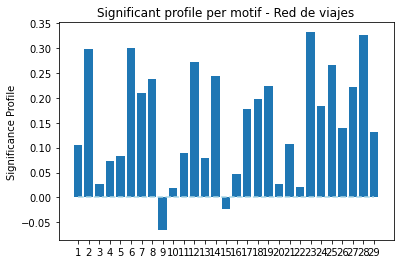

In [70]:
graficar_significant_profile(SP, 'Red de viajes')